In [6]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter


# Task 1 - Data exploration and preparation

## 1.1 Exploration 

Write code that does the following tasks:

**Assign the list of available classes to a variable with name CLASS_NAMES. For each class name, display one image and print the dimensions of the corresponding numpy array.**

In [7]:
#Defining class names to a list variable CLASS_NAMES
CLASS_NAMES = ["street","sea", "mountain", "glacier", "forest", "buildings"]

In [8]:
# Defining the base directory
base_dir = 'Intel_Image_dataset'

# Defining the subdirectories
sub_dirs = ['seg_train', 'seg_test']

In [10]:
# Collect one image path for each class
image_paths = []

for sub_dir in sub_dirs:
    for class_name in CLASS_NAMES:
        class_dir = os.path.join(base_dir, sub_dir, class_name)
        if os.path.isdir(class_dir):
            # Get the first image file in the class directory
            for file_name in os.listdir(class_dir):
                if file_name.lower().endswith(('.jpg')):
                    image_paths.append(os.path.join(class_dir, file_name))
                    break

In [24]:
# Function to display images
def display_images(image_paths, class_names):
    fig, axes = plt.subplots(1, len(CLASS_NAMES), figsize=(20, 5))
    for ax, img_path, class_name in zip(axes, image_paths, class_names):
        img = Image.open(img_path)
        ax.imshow(img)
        width, height = img.size
        ax.set_title(class_name)
        ax.axis('off')
        # Add image dimensions at the bottom
        ax.annotate(f"{width}x{height}", xy=(0.5, -0.15), xycoords='axes fraction', ha='center', va='center', fontsize=12)
    plt.subplots_adjust(wspace=0.5, bottom=0.2)  # Adjust the width space and bottom margin
    plt.show()

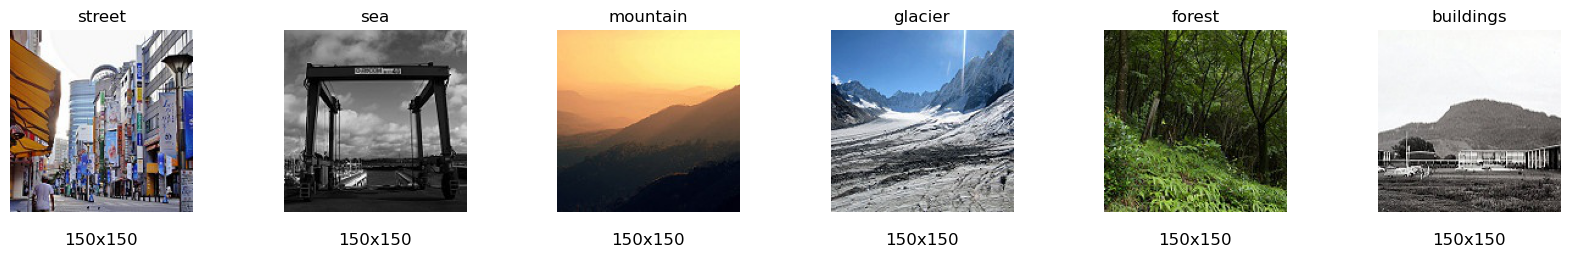

In [25]:
# Displaying the images for each class_names
display_images(image_paths, CLASS_NAMES)


**Determine the number of images in the training and test sets for each class name.**

In [35]:
# Count_images function to count images in each class folder
def count_images(base_dir, sub_dirs, class_names):
    counts = {sub_dir: {class_name: 0 for class_name in class_names} for sub_dir in sub_dirs}
    
    for sub_dir in sub_dirs:
        for class_name in class_names:
            class_dir = os.path.join(base_dir, sub_dir, class_name)
            if os.path.isdir(class_dir):
                counts[sub_dir][class_name] = len([file for file in os.listdir(class_dir) if file.lower().endswith(('.jpg'))])
    
    return counts

In [36]:
# Getting the counts using count_images function
image_counts = count_images(base_dir, sub_dirs, CLASS_NAMES)

In [37]:
# Displaying the counts
for sub_dir, class_counts in image_counts.items():
    print(f"\n{sub_dir}:")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count}")


seg_train:
  street: 2382
  sea: 2274
  mountain: 2512
  glacier: 2404
  forest: 2271
  buildings: 2191

seg_test:
  street: 501
  sea: 510
  mountain: 525
  glacier: 553
  forest: 474
  buildings: 437


**Are there any significant differences between the proportions of images in the training and test sets?**

In [46]:
# Number of images in each class for seg_train
seg_train_counts = {
    "street": 2382,
    "sea": 2274,
    "mountain": 2512,
    "glacier": 2404,
    "forest": 2271,
    "buildings": 2191
}

# Number of images in each class for seg_test
seg_test_counts = {
    "street": 501,
    "sea": 510,
    "mountain": 525,
    "glacier": 553,
    "forest": 474,
    "buildings": 437
}

In [47]:
# Total number of images in seg_train and seg_test
total_train = sum(seg_train_counts.values())
total_test = sum(seg_test_counts.values())

# Calculate proportions
train_proportions = {k: v / total_train for k, v in seg_train_counts.items()}
test_proportions = {k: v / total_test for k, v in seg_test_counts.items()}

In [48]:
# Print proportions
print("Training Set Proportions:")
for k, v in train_proportions.items():
    print(f"{k}: {v:.4f}")

print("\nTest Set Proportions:")
for k, v in test_proportions.items():
    print(f"{k}: {v:.4f}")

Training Set Proportions:
street: 0.1697
sea: 0.1620
mountain: 0.1790
glacier: 0.1713
forest: 0.1618
buildings: 0.1561

Test Set Proportions:
street: 0.1670
sea: 0.1700
mountain: 0.1750
glacier: 0.1843
forest: 0.1580
buildings: 0.1457


**There are minor differences in the image proportions between the training and test sets for each class, but overall they are quite similar.For example:**

* Street: 16.76% in training vs. 16.27% in test
* Sea: 15.99% in training vs. 16.57% in test
* Mountain: 17.66% in training vs. 17.06% in test
* Glacier: 16.90% in training vs. 17.96% in test
* Forest: 15.98% in training vs. 15.39% in test
* Buildings: 15.41% in training vs. 14.14% in test

**Considering how minor the variations are, it appears that the picture proportions in the training and test sets are similar. For ensuring that the model learned on the training set will transfer well to the test set, this consistency is crucial.**